In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 10.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=dfa1912f0244c95cda7dae2812a46873b856a2321840f5a58c132de03a67b2c3
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
df = yf.download("MSFT", start="2016-09-02", end="2020-09-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-02,57.669998,58.189999,57.419998,57.669998,53.357944,18900500
2016-09-06,57.779999,57.799999,57.209999,57.610001,53.302429,16278400
2016-09-07,57.470001,57.840000,57.410000,57.660000,53.348694,17493400
2016-09-08,57.630001,57.790001,57.180000,57.430000,53.135891,20146100
2016-09-09,56.790001,57.520000,56.209999,56.209999,52.007107,35113900


In [ ]:
# set the date as the index
#data=data.set_index(pd.DatetimeIndex(data['Date'].values))

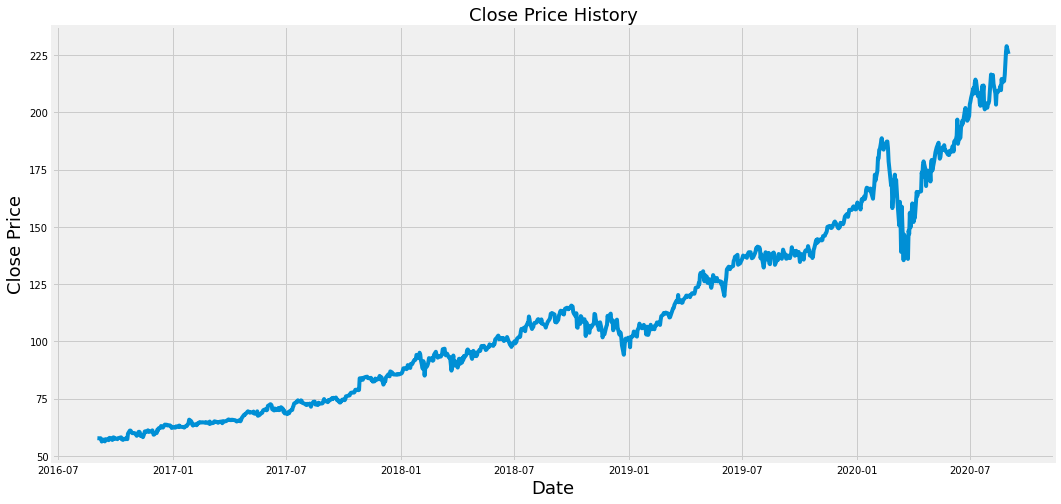

In [ ]:
#Visually show the close prices
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
# Create a function to calculate the Simple Moving Average(SMA)

def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

In [ ]:
#Create two new columns to store the 20 day an 5- dat SMA
df['SMA20']=SMA(df, 20)
df['SMA50']=SMA(df, 50)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA20,SMA50,Signal,Position
Date,,,,,,,,,,
2016-09-02,57.669998,58.189999,57.419998,57.669998,53.357944,18900500,NaN,NaN,0,NaN
2016-09-06,57.779999,57.799999,57.209999,57.610001,53.302429,16278400,NaN,NaN,0,0.0
2016-09-07,57.470001,57.840000,57.410000,57.660000,53.348694,17493400,NaN,NaN,0,0.0
2016-09-08,57.630001,57.790001,57.180000,57.430000,53.135891,20146100,NaN,NaN,0,0.0
2016-09-09,56.790001,57.520000,56.209999,56.209999,52.007107,35113900,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-08-25,213.100006,216.610001,213.100006,216.470001,214.501724,23043700,210.610999,206.6648,1,0.0
2020-08-26,217.880005,222.089996,217.360001,221.149994,219.139175,39600800,211.465499,207.2164,1,0.0
2020-08-27,222.889999,231.149994,219.399994,226.580002,224.519806,57602200,212.599500,207.8632,1,0.0


In [ ]:
#Get the buy and sell signals
df['Signal']=np.where(df['SMA20']> df['SMA50'],1,0)
df['Position']=df['Signal'].diff()


df['Buy']=np.where(df['Position']==1, df["Close"], np.NAN)
df['Sell']=np.where(df['Position']==-1, df["Close"], np.NAN)


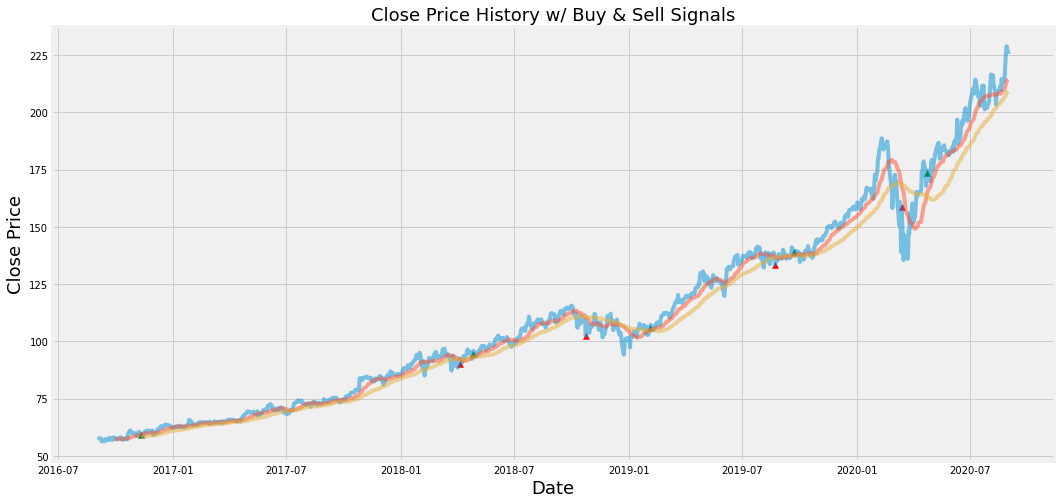

In [ ]:
# Visually show the close price with the SMAs and Buy & Sell signals

plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy & Sell Signals', fontsize=18)
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['SMA20'], alpha=0.5, label='Close')
plt.plot(df['SMA50'], alpha=0.5, label='Close')
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker= '^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker= '^', color='red')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()